In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("Shape of Train images: ", train_images.shape)
print("Shape of Train labels: ", train_labels.shape)
print("Shape of Test images: ", test_images.shape)
print("Shape of Test labels: ", test_labels.shape)

Shape of Train images:  (60000, 28, 28)
Shape of Train labels:  (60000,)
Shape of Test images:  (10000, 28, 28)
Shape of Test labels:  (10000,)


In [4]:
print("Train Labels: ", train_labels)

Train Labels:  [5 0 4 ... 5 6 8]


In [5]:
#print(train_images[1]) #redundant

First 10 data and labels form the MNIST dataset
       5           0           4           1           9           2           1           3           1           4           

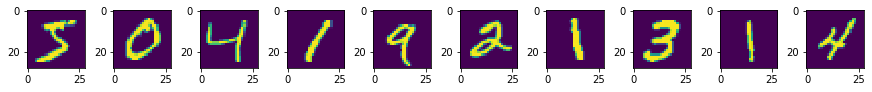

In [6]:
print("First 10 data and labels form the MNIST dataset")
#labels
print(end="       ") 
for i in range(10):
    label = train_labels[i]
    print(label, end="           ") 

#data
plt.figure(figsize=(15, 2))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(train_images[i])
plt.show()  

In [7]:
#reshape data to tensor
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

In [8]:
def select_model(model_num):
    if model_num == 1:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')            
        ])
        
    if model_num == 2:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')            
        ])
    
    if model_num == 3:
        model = keras.models.Sequential([
            keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
            keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
            keras.layers.MaxPool2D((2, 2)),
            keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
            keras.layers.Flatten(),
            keras.layers.Dense(10, activation = 'softmax')            
        ])
        
    return model

In [9]:
model = select_model(3)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
model.fit(train_images, train_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 146us/sample - loss: 0.1930 - accuracy: 0.9564
Epoch 2/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0557 - accuracy: 0.9833
Epoch 3/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0467 - accuracy: 0.9860
Epoch 4/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0375 - accuracy: 0.9884
Epoch 5/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0317 - accuracy: 0.9904


In [13]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print("Test loss: ", test_loss)
print("Test accuracy: ", accuracy)

10000/10000 - 1s - loss: 0.0441 - accuracy: 0.9885
Test loss:  0.04405489977597754
Test accuracy:  0.9885


In [14]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
print("Prediction: ", pred.shape)
print("Test labels: ", test_labels.shape)

Prediction:  (10000, 10)
Test labels:  (10000,)


In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label], 100*np.max(predictions_array), Number[true_label]), color = color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predictions_label = np.argmax(predictions_array)
    plt.xticks(Number)
    
    thisplot[predictions_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

<function matplotlib.pyplot.show(*args, **kw)>

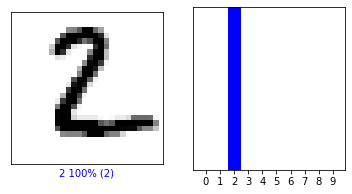

In [18]:
i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, pred, test_labels)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

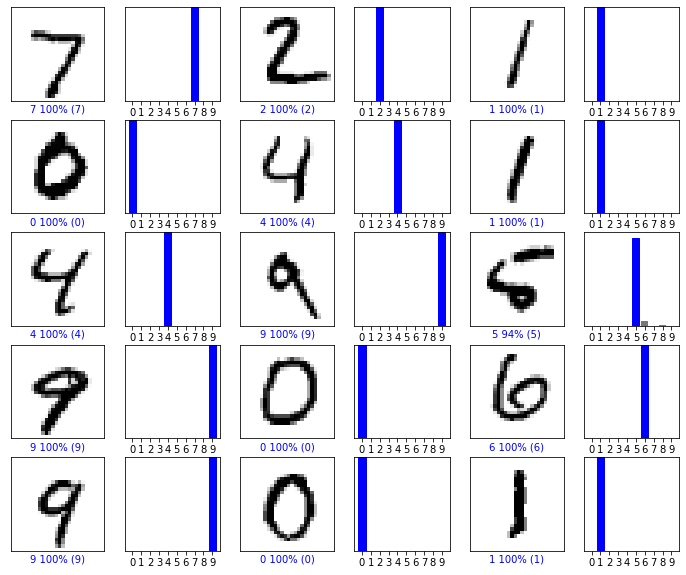

In [19]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i + 1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_value_array(i, pred, test_labels)
plt.show

In [20]:
def find_mnist(prediction_array, true_label, tr_fa):
    result_index = []
    
    if tr_fa == 1:
        for i in range(true_label.shape[0]):
            if np.argmax(prediction_array[i]) == true_label[i]:
                result_index.append(i)
    else:
        for i in range(true_label.shape[0]):
            if np.argmax(prediction_array[i]) != true_label[i]:
                result_index.append(i)
                
    return result_index
    
def plot_result(index, prediction_array, true_label, tr_fa):
    num_cols = 5
    num_rows = 5
    
    if tr_fa == 1:
        color = 'blue'
    else:
        color = 'red'
    
    plt.figure(figsize = (2*2*num_cols, 2*num_rows))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
            idx = index[i]
            predicted_buf, true_buf = prediction_array[idx], true_label[idx]
            predicted_label = np.argmax(predicted_buf)
            
            plt.subplot(num_rows, 2*num_cols, 2*i + 1)
            plt.imshow(test_images[idx])
            plt.xlabel("True:{} Pred:{}".format(Number[true_buf], Number[predicted_label]), color = color)
            plt.subplot(num_rows, 2*num_cols, 2*i + 2)
            plt.bar(range(10), prediction_array[idx], color = color)
            plt.xticks(Number)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


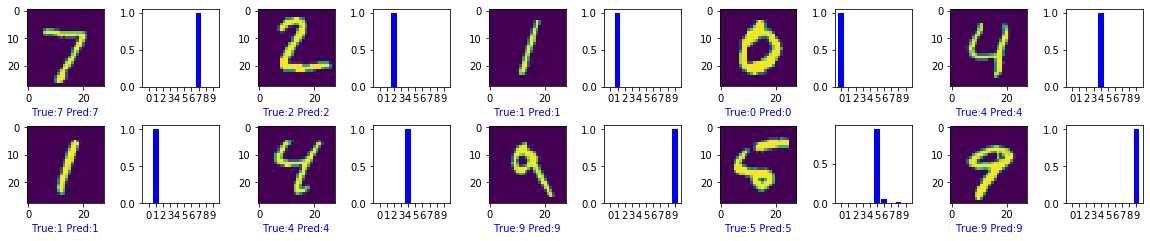

In [21]:
index = find_mnist(pred, test_labels, 1)
index_splice = index[:10]
print(index[:10])
plot_result(index_splice, pred, test_labels, 1)

[18, 36, 184, 320, 321, 359, 445, 490, 625, 674]


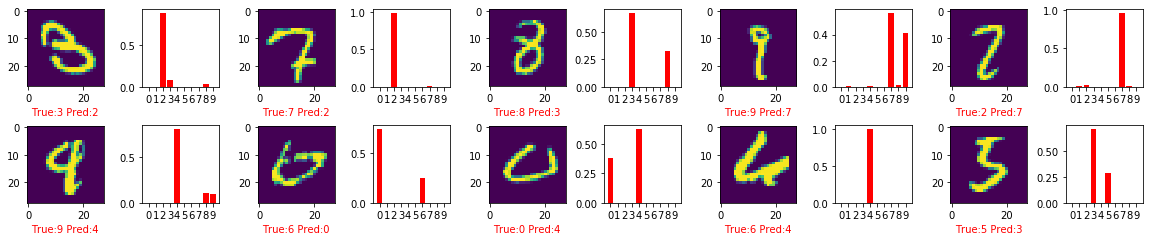

In [22]:
index = find_mnist(pred, test_labels, 0)
index_splice = index[:10]
print(index[:10])
plot_result(index_splice, pred, test_labels, 0)